# Part 2: Descriptive Analysis
In this part, three KPIs are calculated in the first section for the next bike data for each city. These include:
1. total trip durations per hour 
2. total distance per hour 
3. total number of used bikes per hour

Based on this data, section 2 examines the rental patterns.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

path = r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Abgabe\Data"
path_fig = r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Abgabe\Figures"

# 1. Hourly KPIs

## 1.1 Berlin

In [55]:
# importing data sets
df = pd.read_csv(path + r"\berlin_final.csv")
df_w = pd.read_csv(path + r"\berlin_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

**1st KPI: Absolute number of trips per hour**

In [56]:
def get_trips(datetime):
    return len(df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].index)

In [57]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

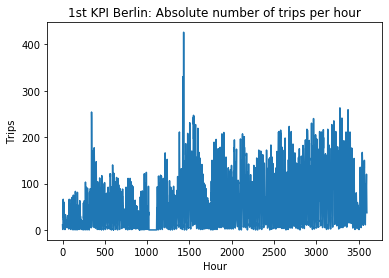

In [58]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.title('1st KPI Berlin: Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.savefig(path_fig + r'\kpi1_b.png')
plt.show()


**2nd KPI: Trip duration per hour**

In [59]:
def get_duration(datetime):
    sum = 0
    df_duration = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for duration in df_duration["trip_duration"]:
        sum = sum + duration
    return sum

In [60]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

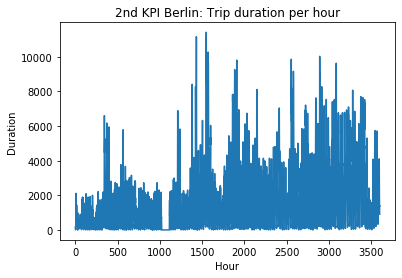

In [61]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.title('2nd KPI Berlin: Trip duration per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.savefig(path_fig + r'\kpi2_b.png')
plt.show()


**3rd KPI: Distance per hour**

In [62]:
def get_distance(datetime):
    sum = 0
    df_distance = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for distance in df_distance["distance"]:
        sum = sum + distance
    return sum

df_w["distance"] = df_w["datetime"].apply(get_distance)

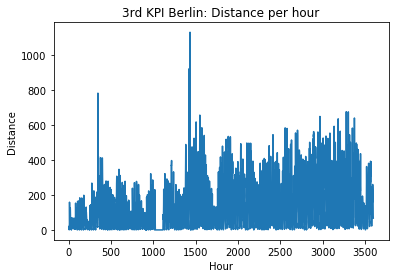

In [63]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.title('3rd KPI Berlin: Distance per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')
plt.savefig(path_fig + r'\kpi3_b.png')
plt.show()


## 1.2 Frankfurt

**1st KPI: Absolute number of trips per hour**

In [64]:
df = pd.read_csv(path + r"\frankfurt_final.csv")
df_w = pd.read_csv(path + r"\frankfurt_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)


In [65]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

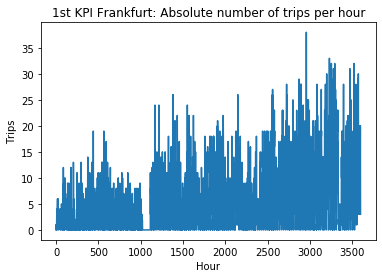

In [66]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.title('1st KPI Frankfurt: Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.savefig(path_fig + r'\kpi1_f.png')
plt.show()


**2nd KPI: Trip duration per hour**

In [67]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

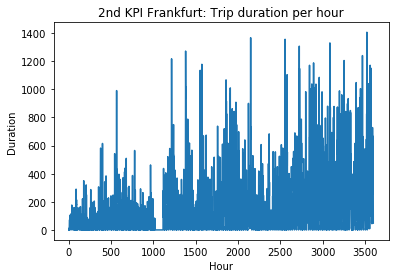

In [68]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.title('2nd KPI Frankfurt: Trip duration per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.savefig(path_fig + r'\kpi2_f.png')
plt.show()


**3rd KPI: Distance per hour**

In [69]:
df_w["distance"] = df_w["datetime"].apply(get_distance)

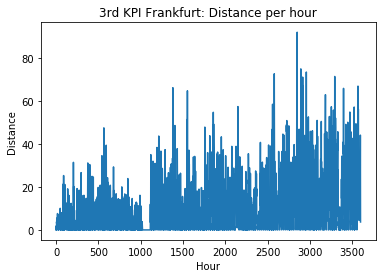

In [70]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.title('3rd KPI Frankfurt: Distance per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')

plt.savefig(path_fig + r'\kpi3_f.png')
plt.show()

# 2. Rental Patterns

In [71]:
df_b = pd.read_csv(path + r"\berlin_final.csv")
df_bw = pd.read_csv(path + r"\berlin_weather.csv")
df_f = pd.read_csv(path + r"\frankfurt_final.csv")
df_fw = pd.read_csv(path + r"\frankfurt_weather.csv")

In [72]:
def replace_minutes(dt):
    return dt.replace(minute=0)

In [73]:
df_b.rename(columns={'day':'datetime'}, inplace=True)
df_b.datetime = pd.to_datetime(df_b.datetime)
df_bw.datetime = pd.to_datetime(df_bw.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [74]:
df_f.rename(columns={'day':'datetime'}, inplace=True)
df_f.datetime = pd.to_datetime(df_f.datetime)
df_fw.datetime = pd.to_datetime(df_fw.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [75]:
df_b.datetime = df_b.datetime.apply(replace_minutes)

In [76]:
df_f.datetime = df_f.datetime.apply(replace_minutes)

In [77]:
df_b = pd.merge(df_b, df_bw, how="left", on =["datetime"])

In [78]:
df_f = pd.merge(df_f, df_fw, how="left", on =["datetime"])

## 2.1 Trip Count


c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


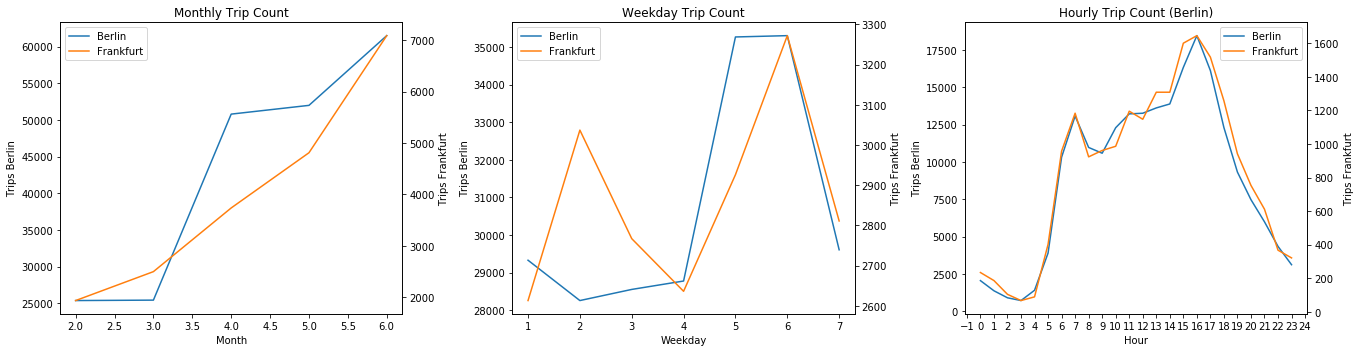

In [79]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))
color1 = 'tab:blue'
color2 = 'tab:orange'

# subplot 1: monthly trip count
data_bm = pd.DataFrame()
data_fm = pd.DataFrame()
data_bm['month'] = df_b.month.value_counts()
data_fm['month'] = df_f.month.value_counts()
data_bm.sort_index(inplace=True)
data_fm.sort_index(inplace=True)


axes[0].set_title("Monthly Trip Count")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trips Berlin')
axes0 = axes[0].plot(data_bm.index, data_bm.month, label='Berlin')


axes01 = axes[0].twinx()
axes01.set_ylabel('Trips Frankfurt')
axes02 = axes01.plot(data_fm.index, data_fm.month, label='Frankfurt', color=color2)

axes0_comp = axes0 + axes02
labs0 = [l.get_label() for l in axes0_comp]
axes[0].legend(axes0_comp, labs0, loc=0)

# subplot 2: weekday trip count
data_bw = pd.DataFrame()
data_fw = pd.DataFrame()
data_bw['weekday'] = df_b.weekday.value_counts()
data_fw['weekday'] = df_f.weekday.value_counts()
data_bw.sort_index(inplace=True)
data_fw.sort_index(inplace=True)

axes[1].set_title("Weekday Trip Count")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trips Berlin')
axes1 = axes[1].plot(data_bw.index, data_bw.weekday, label='Berlin')

axes11 = axes[1].twinx()
axes11.set_ylabel('Trips Frankfurt')
axes12 = axes11.plot(data_fw.index, data_fw.weekday, label='Frankfurt', color=color2)

axes1_comp = axes1 + axes12
labs1 = [l.get_label() for l in axes1_comp]
axes[1].legend(axes1_comp, labs1, loc=0)


# subplot 3: daily trip count
data_bd = pd.DataFrame()
data_fd = pd.DataFrame()
data_bd['hour'] = df_b.hour.value_counts()
data_fd['hour'] = df_f.hour.value_counts()
data_bd.sort_index(inplace=True)
data_fd.sort_index(inplace=True)

axes[2].set_title("Hourly Trip Count (Berlin)")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trips Berlin')
axes2 = axes[2].plot(data_bd.index, data_bd.hour, label='Berlin')

axes21 = axes[2].twinx()
axes21.set_ylabel('Trips Frankfurt')
axes22 = axes21.plot(data_fd.index, data_fd.hour, label='Frankfurt', color=color2)

axes2_comp = axes2 + axes22
labs2 = [l.get_label() for l in axes2_comp]
axes[2].legend(axes2_comp, labs2, loc=0)

diag.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
diag.tight_layout()
diag.savefig(path_fig + r'\rp_trips_count.png')
diag.show()


c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


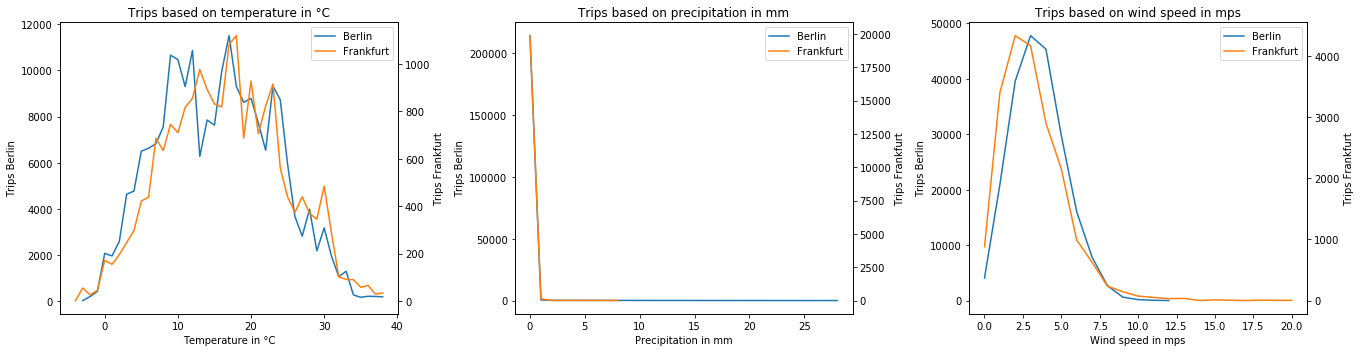

In [80]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))
data_bt = pd.DataFrame()
data_bp = pd.DataFrame()
data_bw = pd.DataFrame()
data_ft = pd.DataFrame()
data_fp = pd.DataFrame()
data_fw = pd.DataFrame()

# subplot 1: Trips based on Temperature in °C
df_b.temperature = df_b.temperature.astype(int)
df_f.temperature = df_f.temperature.astype(int)
data_bt['temp'] = df_b.temperature.value_counts()
data_ft['temp'] = df_f.temperature.value_counts()
data_bt.sort_index(inplace=True)
data_ft.sort_index(inplace=True)


axes[0].set_title("Trips based on temperature in °C")
axes[0].set_xlabel('Temperature in °C')
axes[0].set_ylabel('Trips Berlin')
axes0 = axes[0].plot(data_bt.index, data_bt.temp, label='Berlin')


axes01 = axes[0].twinx()
axes01.set_ylabel('Trips Frankfurt')
axes02 = axes01.plot(data_ft.index, data_ft.temp, label='Frankfurt', color=color2)

axes0_comp = axes0 + axes02
labs0 = [l.get_label() for l in axes0_comp]
axes[0].legend(axes0_comp, labs0, loc=0)

# subplot 2: Trips based on Precipitation in mm
df_b.precipitation = df_b.precipitation.astype(int)
df_f.precipitation = df_f.precipitation.astype(int)
data_bp['prec'] = df_b.precipitation.value_counts()
data_fp['prec'] = df_f.precipitation.value_counts()
data_bp.sort_index(inplace=True)
data_fp.sort_index(inplace=True)
axes[1].set_title("Trips based on precipitation in mm")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trips Berlin')
axes[1].plot(data_bp.index, data_bp.prec, label='Berlin')

axes11 = axes[1].twinx()
axes11.set_ylabel('Trips Frankfurt')
axes12 = axes11.plot(data_fp.index, data_fp.prec, label='Frankfurt', color=color2)

axes1_comp = axes1 + axes12
labs1 = [l.get_label() for l in axes1_comp]
axes[1].legend(axes1_comp, labs1, loc=0)

# subplot 3: Trips based on Precipitation in mm
df_b.wind_speed = df_b.wind_speed.astype(int)
df_f.wind_speed = df_f.wind_speed.astype(int)
data_bw['wind'] = df_b.wind_speed.value_counts()
data_fw['wind'] = df_f.wind_speed.value_counts()
data_bw.sort_index(inplace=True)
data_fw.sort_index(inplace=True)
axes[2].set_title("Trips based on wind speed in mps")
axes[2].set_xlabel('Wind speed in mps')
axes[2].set_ylabel('Trips Berlin')
axes[2].plot(data_bw.index, data_bw.wind, label='Berlin')

axes21 = axes[2].twinx()
axes21.set_ylabel('Trips Frankfurt')
axes22 = axes21.plot(data_fw.index, data_fw.wind, label='Frankfurt', color=color2)

axes2_comp = axes2 + axes22
labs2 = [l.get_label() for l in axes2_comp]
axes[2].legend(axes2_comp, labs2, loc=0)

diag.tight_layout()
diag.savefig(path_fig + r'\rp_trips_count_w.png')
diag.show()


## 2.2 Trip Duration

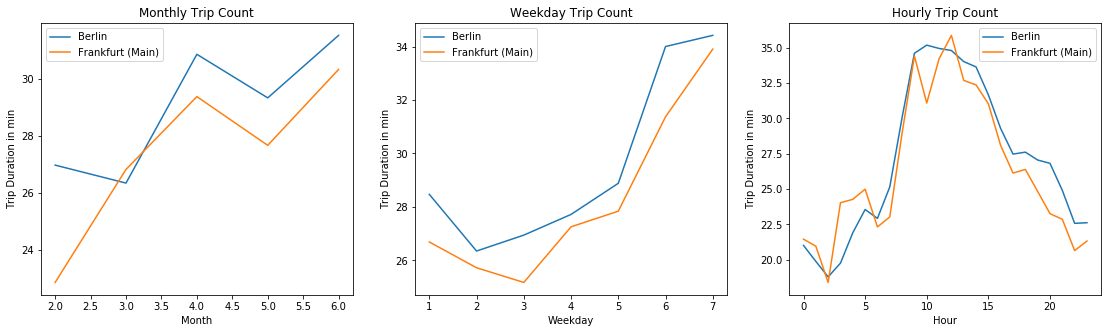

In [81]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration each weekday
data_du_m1 = pd.DataFrame()
data_du_m1 = df_b[['month', 'trip_duration']]
data_du_m1 = data_du_m1.groupby([data_du_m1.month]).mean()
data_du_m1.sort_index(inplace=True)

data_du_m2 = pd.DataFrame()
data_du_m2 = df_f[['month', 'trip_duration']]
data_du_m2 = data_du_m2.groupby([data_du_m2.month]).mean()
data_du_m2.sort_index(inplace=True)

axes[0].plot(data_du_m1.index, data_du_m1.trip_duration, label='Berlin')
axes[0].plot(data_du_m2.index, data_du_m2.trip_duration, label='Frankfurt (Main)')
axes[0].legend()
axes[0].set_title("Monthly Trip Count")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trip Duration in min')

# subplot 2: weekday trip count
data_du_w1 = pd.DataFrame()
data_du_w1 = df_b[['weekday', 'trip_duration']]
data_du_w1 = data_du_w1.groupby([data_du_w1.weekday]).mean()
data_du_w1.sort_index(inplace=True)

data_du_w2 = pd.DataFrame()
data_du_w2 = df_f[['weekday', 'trip_duration']]
data_du_w2 = data_du_w2.groupby([data_du_w2.weekday]).mean()
data_du_w2.sort_index(inplace=True)

axes[1].plot(data_du_w1.index, data_du_w1.trip_duration, label='Berlin')
axes[1].plot(data_du_w2.index, data_du_w2.trip_duration, label='Frankfurt (Main)')
axes[1].legend()
axes[1].set_title("Weekday Trip Count")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trip Duration in min')

# subplot 3: daily trip count
data_du_d1 = pd.DataFrame()
data_du_d1 = df_b[['hour', 'trip_duration']]
data_du_d1 = data_du_d1.groupby([data_du_d1.hour]).mean()
data_du_d1.sort_index(inplace=True)

data_du_d2 = pd.DataFrame()
data_du_d2 = df_f[['hour', 'trip_duration']]
data_du_d2 = data_du_d2.groupby([data_du_d2.hour]).mean()
data_du_d2.sort_index(inplace=True)

axes[2].plot(data_du_d1.index, data_du_d1.trip_duration, label='Berlin')
axes[2].plot(data_du_d2.index, data_du_d2.trip_duration, label='Frankfurt (Main)')
axes[2].legend()
axes[2].set_title("Hourly Trip Count")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trip Duration in min')

diag.savefig(path_fig + r'\rp_trip_duration_bf.png')

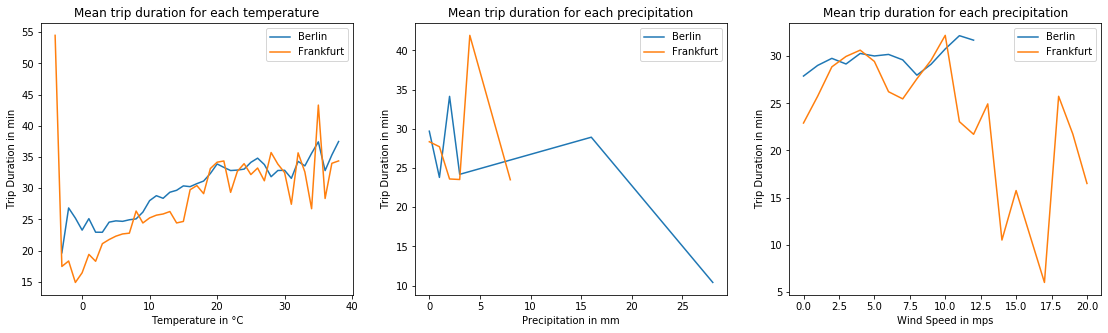

In [82]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_du_bt = pd.DataFrame()
data_du_bt = df_b[['temperature', 'trip_duration']]
data_du_bt = data_du_bt.groupby([data_du_bt.temperature]).mean()
data_du_bt.sort_index(inplace=True)
data_du_ft = pd.DataFrame()
data_du_ft = df_f[['temperature', 'trip_duration']]
data_du_ft = data_du_ft.groupby([data_du_ft.temperature]).mean()
data_du_ft.sort_index(inplace=True)

axes[0].plot(data_du_bt.index, data_du_bt.trip_duration, label='Berlin')
axes[0].plot(data_du_ft.index, data_du_ft.trip_duration, label='Frankfurt')
axes[0].set_title("Mean trip duration for each temperature")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Duration in min')

axes[0].legend()

# subplot 2: Mean trip duration for each precipitation
data_du_bp = pd.DataFrame()
data_du_bp = df_b[['precipitation', 'trip_duration']]
data_du_bp = data_du_bp.groupby([data_du_bp.precipitation]).mean()
data_du_bp.sort_index(inplace=True)
data_du_fp = pd.DataFrame()
data_du_fp = df_f[['precipitation', 'trip_duration']]
data_du_fp = data_du_fp.groupby([data_du_fp.precipitation]).mean()
data_du_fp.sort_index(inplace=True)

axes[1].plot(data_du_bp.index, data_du_bp.trip_duration, label='Berlin')
axes[1].plot(data_du_fp.index, data_du_fp.trip_duration, label='Frankfurt')
axes[1].set_title("Mean trip duration for each precipitation")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Duration in min')

axes[1].legend()

# subplot 3: Mean trip duration for each wind speed
data_du_bw = pd.DataFrame()
data_du_bw = df_b[['wind_speed', 'trip_duration']]
data_du_bw = data_du_bw.groupby([data_du_bw.wind_speed]).mean()
data_du_bw.sort_index(inplace=True)
data_du_fw = pd.DataFrame()
data_du_fw = df_f[['wind_speed', 'trip_duration']]
data_du_fw = data_du_fw.groupby([data_du_fw.wind_speed]).mean()
data_du_fw.sort_index(inplace=True)

axes[2].plot(data_du_bw.index, data_du_bw.trip_duration, label='Berlin')
axes[2].plot(data_du_fw.index, data_du_fw.trip_duration, label='Frankfurt')
axes[2].set_title("Mean trip duration for each precipitation")
axes[2].set_xlabel('Wind Speed in mps')
axes[2].set_ylabel('Trip Duration in min')

axes[2].legend()

diag.savefig(path_fig + r'\rp_trip_duration_bfw.png')


## 2.3 Trip Distance

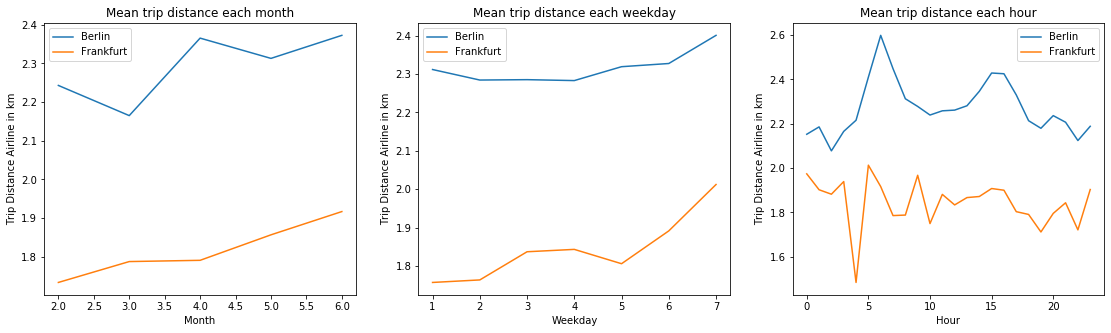

In [83]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip distance each month
data_di_m1 = pd.DataFrame()
data_di_m1 = df_b[['month', 'distance']]
data_di_m1 = data_di_m1.groupby([data_di_m1.month]).mean()
data_di_m1.sort_index(inplace=True)

data_di_m2 = pd.DataFrame()
data_di_m2 = df_f[['month', 'distance']]
data_di_m2 = data_di_m2.groupby([data_di_m2.month]).mean()
data_di_m2.sort_index(inplace=True)

axes[0].plot(data_di_m1.index, data_di_m1.distance, label='Berlin')
axes[0].plot(data_di_m2.index, data_di_m2.distance, label='Frankfurt')
axes[0].legend()
axes[0].set_title("Mean trip distance each month")
axes[0].set_xlabel('Month') 
axes[0].set_ylabel('Trip Distance Airline in km')

# subplot 2: Mean trip distance each weekday
data_di_w1 = pd.DataFrame()
data_di_w1 = df_b[['weekday', 'distance']]
data_di_w1 = data_di_w1.groupby([data_di_w1.weekday]).mean()
data_di_w1.sort_index(inplace=True)

data_di_w2 = pd.DataFrame()
data_di_w2 = df_f[['weekday', 'distance']]
data_di_w2 = data_di_w2.groupby([data_di_w2.weekday]).mean()
data_di_w2.sort_index(inplace=True)
                     
axes[1].plot(data_di_w1.index, data_di_w1.distance, label='Berlin')
axes[1].plot(data_di_w2.index, data_di_w2.distance, label='Frankfurt')
axes[1].legend()
axes[1].set_title("Mean trip distance each weekday")
axes[1].set_xlabel('Weekday') 
axes[1].set_ylabel('Trip Distance Airline in km')

# subplot 3: Mean trip distance each hour
data_di_d1 = pd.DataFrame()
data_di_d1 = df_b[['hour', 'distance']]
data_di_d1 = data_di_d1.groupby([data_di_d1.hour]).mean()
data_di_d1.sort_index(inplace=True)

data_di_d2 = pd.DataFrame()
data_di_d2 = df_f[['hour', 'distance']]
data_di_d2 = data_di_d2.groupby([data_di_d2.hour]).mean()
data_di_d2.sort_index(inplace=True)
                     
axes[2].plot(data_di_d1.index, data_di_d1.distance, label='Berlin')
axes[2].plot(data_di_d2.index, data_di_d2.distance, label='Frankfurt')
axes[2].legend()
axes[2].set_title("Mean trip distance each hour")
axes[2].set_xlabel('Hour') 
axes[2].set_ylabel('Trip Distance Airline in km')

diag.savefig(path_fig + r'\rp_distance_bf.png')

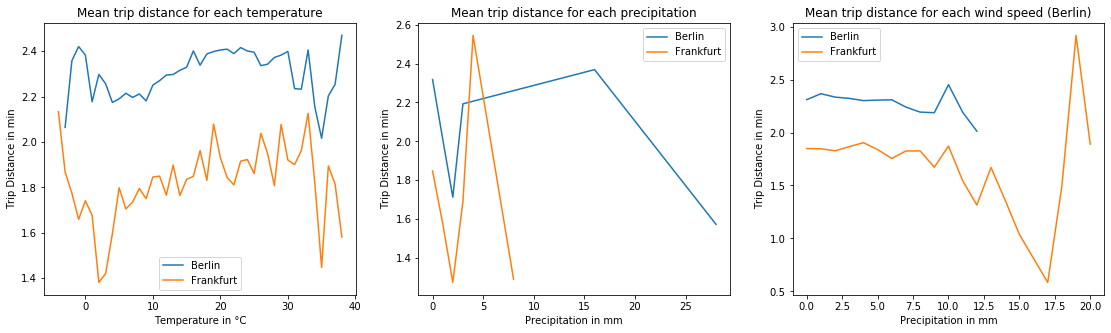

In [84]:
diag, axes = plt.subplots(1, 3, figsize=(19, 5))

# subplot 1: Mean trip duration for each temperature
data_di_bt = pd.DataFrame()
data_di_bt = df_b[['temperature', 'distance']]
data_di_bt = data_di_bt.groupby([data_di_bt.temperature]).mean()
data_di_bt.sort_index(inplace=True)
data_di_ft = pd.DataFrame()
data_di_ft = df_f[['temperature', 'distance']]
data_di_ft = data_di_ft.groupby([data_di_ft.temperature]).mean()
data_di_ft.sort_index(inplace=True)

axes[0].plot(data_di_bt.index, data_di_bt.distance, label='Berlin')
axes[0].plot(data_di_ft.index, data_di_ft.distance, label='Frankfurt')
axes[0].set_title("Mean trip distance for each temperature")
axes[0].set_xlabel('Temperature in °C') 
axes[0].set_ylabel('Trip Distance in min')

axes[0].legend()

# subplot 2: Mean trip duration for each precipitation
data_di_bp = pd.DataFrame()
data_di_bp = df_b[['precipitation', 'distance']]
data_di_bp = data_di_bp.groupby([data_di_bp.precipitation]).mean()
data_di_bp.sort_index(inplace=True)
data_di_fp = pd.DataFrame()
data_di_fp = df_f[['precipitation', 'distance']]
data_di_fp = data_di_fp.groupby([data_di_fp.precipitation]).mean()
data_di_fp.sort_index(inplace=True)

axes[1].plot(data_di_bp.index, data_di_bp.distance, label='Berlin')
axes[1].plot(data_di_fp.index, data_di_fp.distance, label='Frankfurt')
axes[1].set_title("Mean trip distance for each precipitation")
axes[1].set_xlabel('Precipitation in mm') 
axes[1].set_ylabel('Trip Distance in min')

axes[1].legend()

# subplot 2: Mean trip duration for each precipitation
data_di_bw = pd.DataFrame()
data_di_bw = df_b[['wind_speed', 'distance']]
data_di_bw = data_di_bw.groupby([data_di_bw.wind_speed]).mean()
data_di_bw.sort_index(inplace=True)
data_di_fw = pd.DataFrame()
data_di_fw = df_f[['wind_speed', 'distance']]
data_di_fw = data_di_fw.groupby([data_di_fw.wind_speed]).mean()
data_di_fw.sort_index(inplace=True)

axes[2].plot(data_di_bw.index, data_di_bw.distance, label='Berlin')
axes[2].plot(data_di_fw.index, data_di_fw.distance, label='Frankfurt')
axes[2].set_title("Mean trip distance for each wind speed (Berlin)")
axes[2].set_xlabel('Precipitation in mm') 
axes[2].set_ylabel('Trip Distance in min')

axes[2].legend()

diag.savefig(path_fig + r'\rp_distance_bfw.png')


# 3. Temperature Overview

## 3.1 Berlin

In [85]:
df = pd.read_csv(path + r"\berlin_final.csv")
df_w = pd.read_csv(path + r"\berlin_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

In [86]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

32

In [87]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [88]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

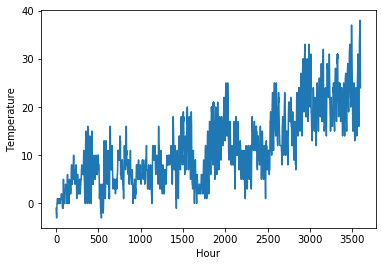

In [89]:
data_w = pd.DataFrame()
data_w['temperature'] = df_w.temperature.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.temperature, label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()

## 3.2 Frankfurt (Main)

In [90]:
df = pd.read_csv(path + r"\frankfurt_final.csv")
df_w = pd.read_csv(path + r"\frankfurt_weather.csv")
df_w.datetime = pd.to_datetime(df_w.datetime)

In [91]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

0

In [92]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [93]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

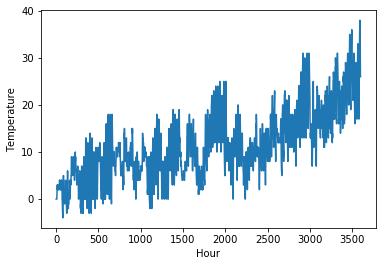

In [94]:
data_w = pd.DataFrame()
data_w['temperature'] = df_w.temperature.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.temperature, label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()